In [15]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.cross_validation import train_test_split

from IPython.display import display

### Task 1: Select what features you'll use.
- features_list is a list of strings, each of which is a feature name.
- The first feature must be "poi".

In [16]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)



#### Dataset exploration

##### Preparing the dataframe

In [17]:
# Loading the data into a Pandas dataframe
df_people = pd.DataFrame(data_dict).transpose()

In [18]:
# compare the original dictionary 
# with the dictionary reconstructed from the dataframe:  
print(df_people.to_dict('index') == data_dict)

True


In [19]:
# Taking a look at the data types
df_people.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

There are 146 people (rows) and 21 features (columns) in the dataset.

Looks like the data types are not set correctly. I'll have to clean that up before continuing.

In [20]:
# Taking a look at some records

display(df_people.head())
display(df_people.tail())

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
WINOKUR JR. HERBERT S,NaN,NaN,-25000,108579,NaN,NaN,1413,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,84992,NaN
WODRASKA JOHN,NaN,NaN,NaN,NaN,john.wodraska@enron.com,NaN,NaN,NaN,NaN,NaN,...,NaN,189583,False,NaN,NaN,NaN,NaN,NaN,189583,NaN
WROBEL BRUCE,NaN,NaN,NaN,NaN,NaN,139130,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,139130
YEAGER F SCOTT,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552,53947,NaN,NaN,NaN,...,NaN,147950,True,3576206,NaN,158403,NaN,NaN,360300,11884758
YEAP SOON,NaN,NaN,NaN,NaN,NaN,192758,55097,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,55097,192758


In [21]:
# Setting proper NaN values
df_people.replace(to_replace='NaN', value=np.nan, inplace=True)

In [22]:
# Taking a look at the data types again
df_people.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt_with_poi      86 non-null float64

After converting the string value "NaN" to proper numpy format, the data types looks correct now. Email address is object (indicating string values), poi is boolean, and the rest are numeric.

##### Taking a closer look at null values 

In [23]:
# Getting counts of NaN values per colum
def nan_counts(columns = df_people.columns):
    nan_counts = df_people[columns].isnull().sum().sort_values(ascending=False).to_frame('count')
    nan_counts['prop'] = round(nan_counts['count'] / 146,4)
    
    return nan_counts

In [24]:
nan_counts()

,count,prop
loan_advances,142,0.9726
director_fees,129,0.8836
restricted_stock_deferred,128,0.8767
deferral_payments,107,0.7329
deferred_income,97,0.6644
long_term_incentive,80,0.5479
bonus,64,0.4384
from_this_person_to_poi,60,0.4110
from_poi_to_this_person,60,0.4110
from_messages,60,0.4110


Looks like some features might not be good to use due to lack of data points. I notice that the dataset does not include email address for 23.3% of the people, and seem to lack information about sent and received emails for about 40.4% of the people in the dataset. I might want to try running the ML algorithms both with and without records lacking any email information.

In [25]:
# Checking if all the users with missing from_messages are the same as the users with missing to_messages, and vice versa.
df_people[df_people['from_messages'].isnull() != df_people['to_messages'].isnull()]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value


##### Getting more info about the features

Starting with descriptive statistics:

In [26]:
df_people['poi'].sum()

18

In [27]:
display(np.round(df_people.describe(),2))

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,82.00,39.00,49.00,17.00,1.020000e+02,95.00,86.00,86.00,86.00,4.0,66.00,93.00,1.100000e+02,18.00,95.00,86.00,86.00,1.250000e+02,1.260000e+02
mean,2374234.61,1642674.15,-1140475.14,166804.88,5.987054e+06,108728.92,608.79,64.90,41.23,41962500.0,1470361.45,919064.97,2.321741e+06,166410.56,562194.29,1176.47,2073.86,5.081526e+06,6.773957e+06
std,10713327.97,5161929.97,4025406.38,319891.41,3.106201e+07,533534.81,1841.03,86.98,100.07,47083208.7,5942759.32,4589252.91,1.251828e+07,4201494.31,2716369.15,1178.32,2582.70,2.906172e+07,3.895777e+07
min,70000.00,-102500.00,-27992891.00,3285.00,3.285000e+03,148.00,12.00,0.00,0.00,400000.0,69223.00,2.00,-2.604490e+06,-7576788.00,477.00,2.00,57.00,1.480000e+02,-4.409300e+04
25%,431250.00,81573.00,-694862.00,98784.00,5.278862e+05,22614.00,22.75,10.00,1.00,1600000.0,281250.00,1215.00,2.540180e+05,-389621.75,211816.00,249.75,541.25,3.944750e+05,4.945102e+05
50%,769375.00,227449.00,-159792.00,108579.00,1.310814e+06,46950.00,41.00,35.00,8.00,41762500.0,442035.00,52382.00,4.517400e+05,-146975.00,259996.00,740.50,1211.00,1.101393e+06,1.102872e+06
75%,1200000.00,1002671.50,-38346.00,113784.00,2.547724e+06,79952.50,145.50,72.25,24.75,82125000.0,938672.00,362096.00,1.002370e+06,-75009.75,312117.00,1888.25,2634.75,2.093263e+06,2.949847e+06
max,97343619.00,32083396.00,-833.00,1398517.00,3.117640e+08,5235198.00,14368.00,528.00,609.00,83925000.0,48521928.00,42667589.00,1.303223e+08,15456290.00,26704229.00,5521.00,15149.00,3.098866e+08,4.345095e+08


In [28]:
print("All:")
display(df_people['poi'].value_counts())
print(" ")
(print("Only people with email address:"))
display(df_people[df_people['email_address'].isnull()==False]['poi'].value_counts())
print(" ")
(print("Only people with additional email data:"))
display(df_people[df_people['from_messages'].isnull()==False]['poi'].value_counts())

All:


False    128
True      18
Name: poi, dtype: int64

 
Only people with email address:


False    93
True     18
Name: poi, dtype: int64

 
Only people with additional email data:


False    72
True     14
Name: poi, dtype: int64

The dataset contains 18 known POIs, which is roughly 12% of the people in the dataset. It makes sense to focus on the differences between the POIs and non-POIs for feature selection.

The dataset has email address for all known POIs, and additional email information for roughly 78% of the POIs.

In [29]:
#Looking for differences between POIs and others
def boxplot_by_poi(features = False):
    
    if features:
        features = features
    else:
        features = ['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
       'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
       'long_term_incentive', 'other', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value']
    
    for ind in df_people[features]:
        df_temp = df_people[['poi', ind]].dropna().copy()
        df_grouped = df_temp.groupby('poi')
        display(np.round(df_grouped.describe(),2))

        top_10 = df_people[ind].quantile(.9)
        bottom_10 = df_people[ind].quantile(.1)
        ax = df_temp.boxplot(by = 'poi')
        ax.set_ylim(bottom_10, top_10)
        plt.suptitle('')
        plt.xlabel('POI')
        plt.show()

bonus                                                          \
      count        mean          std       min       25%        50%   
poi                                                                   
False  66.0  2446776.35  11917761.23   70000.0  400000.0   725000.0   
True   16.0  2074999.94   2047437.32  200000.0  775000.0  1275000.0   

                              
             75%         max  
poi                           
False  1000000.0  97343619.0  
True   2062500.0   7000000.0

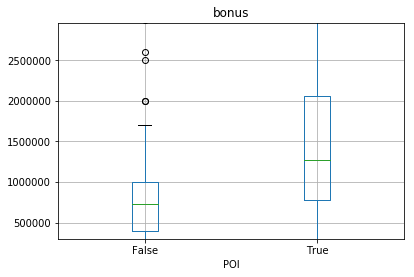

deferral_payments                                                        \
                  count        mean         std       min       25%       50%   
poi                                                                             
False              34.0  1807788.85  5510228.01 -102500.0  87468.75  382532.5   
True                5.0   519894.20   912889.50   10259.0  27610.00  202911.0   

                               
              75%         max  
poi                            
False  1066353.75  32083396.0  
True    214678.00   2144013.0

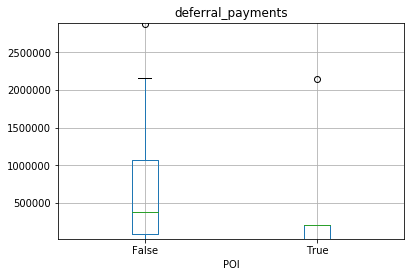

deferred_income                                                  \
                count        mean         std         min         25%   
poi                                                                     
False            38.0 -1170916.68  4531596.79 -27992891.0  -581243.75   
True             11.0 -1035313.45  1334971.88  -3504386.0 -1860244.50   

                                   
            50%       75%     max  
poi                                
False -123142.0  -37086.0 -1042.0  
True  -262500.0 -122031.0  -833.0

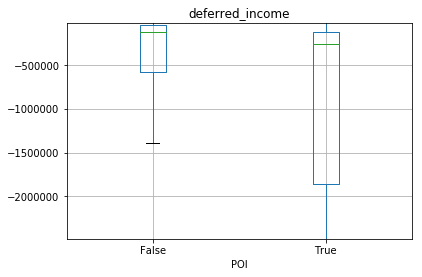

director_fees                                                   \
              count       mean        std     min      25%       50%   
poi                                                                    
False          17.0  166804.88  319891.41  3285.0  98784.0  108579.0   

                            
            75%        max  
poi                         
False  113784.0  1398517.0

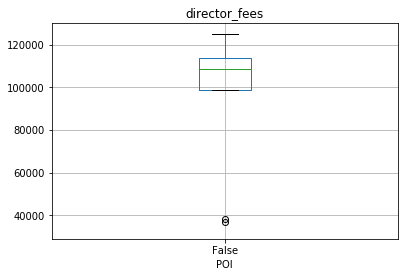

exercised_stock_options                                                 \
                        count         mean          std       min        25%   
poi                                                                            
False                    90.0   5390155.12  32755563.86    3285.0   450758.5   
True                     12.0  10463793.67  12382588.13  384728.0  1456581.0   

                                            
             50%          75%          max  
poi                                         
False  1043324.5   2204999.25  311764000.0  
True   3914557.0  19386043.75   34348384.0

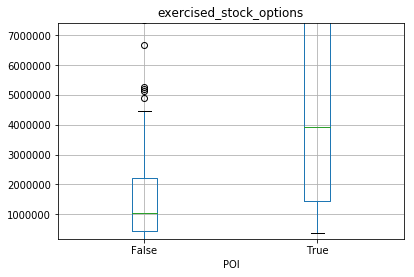

expenses                                                             \
         count       mean        std      min       25%      50%      75%   
poi                                                                         
False     77.0  120149.58  592508.49    148.0  18834.00  46145.0  78552.0   
True      18.0   59873.83   37524.66  16514.0  31323.25  50448.5  84125.0   

                  
             max  
poi               
False  5235198.0  
True    127017.0

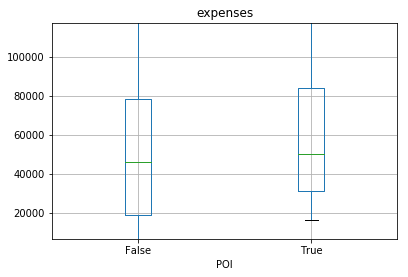

from_messages                                                   
              count    mean      std   min   25%   50%    75%      max
poi                                                                   
False          72.0  668.76  1979.00  12.0  20.5  41.0  216.5  14368.0
True           14.0  300.36   805.84  16.0  33.0  44.5  101.5   3069.0

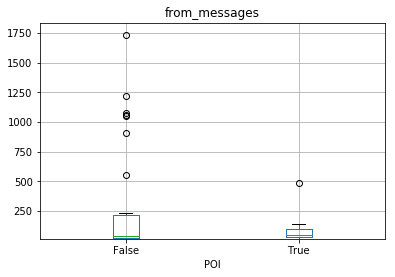

from_poi_to_this_person                                               
                        count   mean    std   min   25%   50%     75%    max
poi                                                                         
False                    72.0  58.50  88.00   0.0  10.0  26.5   61.75  528.0
True                     14.0  97.79  76.06  13.0  44.5  62.0  135.75  240.0

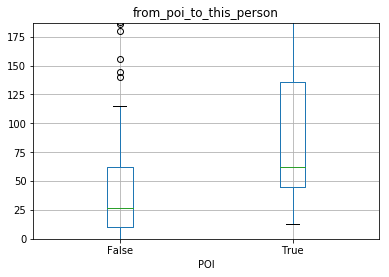

from_this_person_to_poi                                              
                        count   mean     std  min   25%   50%    75%    max
poi                                                                        
False                    72.0  36.28   85.14  0.0   0.0   6.0  23.25  411.0
True                     14.0  66.71  158.29  4.0  12.5  15.5  28.75  609.0

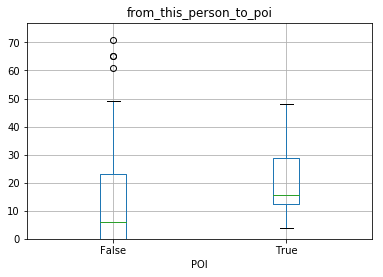

loan_advances                                                   \
              count        mean          std         min         25%   
poi                                                                    
False           3.0  28775000.0  47768000.53    400000.0   1200000.0   
True            1.0  81525000.0          NaN  81525000.0  81525000.0   

                                           
              50%         75%         max  
poi                                        
False   2000000.0  42962500.0  83925000.0  
True   81525000.0  81525000.0  81525000.0

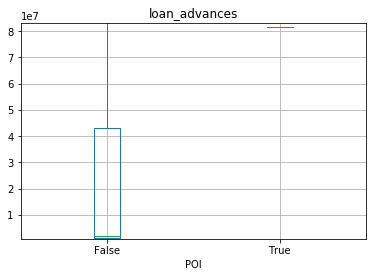

long_term_incentive                                              \
                    count        mean         std      min        25%   
poi                                                                     
False                54.0  1529361.24  6564217.09  69223.0  260893.25   
True                 12.0  1204862.42   991658.26  71023.0  368978.00   

                                         
             50%        75%         max  
poi                                      
False   395480.5   694862.0  48521928.0  
True   1134637.0  1646772.0   3600000.0

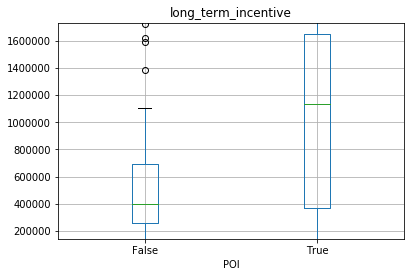

other                                                            \
      count       mean         std    min     25%       50%       75%   
poi                                                                     
False  75.0  946921.19  4983723.25    2.0   959.5   25553.0  387630.5   
True   18.0  802997.39  2417567.95  486.0  4979.5  149204.0  260772.5   

                   
              max  
poi                
False  42667589.0  
True   10359729.0

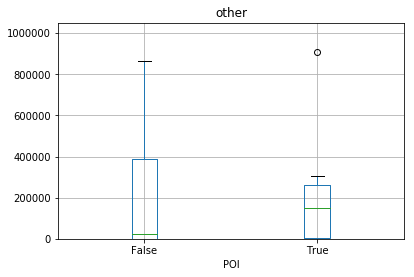

restricted_stock                                                \
                 count        mean          std        min       25%   
poi                                                                    
False             93.0  2322311.53  13541935.65 -2604490.0  213063.0   
True              17.0  2318620.76   3620810.58   126027.0  393818.0   

                                         
            50%        75%          max  
poi                                      
False  417619.0   934065.0  130322299.0  
True   985032.0  2502063.0   14761694.0

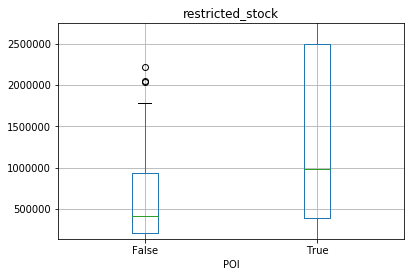

restricted_stock_deferred                                               \
                          count       mean         std        min        25%   
poi                                                                            
False                      18.0  166410.56  4201494.31 -7576788.0 -389621.75   

                                       
            50%       75%         max  
poi                                    
False -146975.0 -75009.75  15456290.0

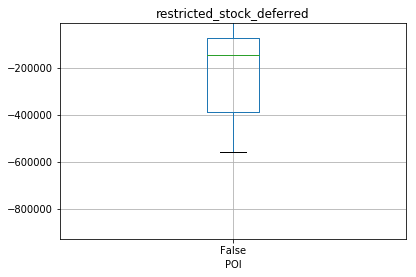

salary                                                                   \
       count       mean         std       min        25%       50%        75%   
poi                                                                             
False   78.0  601152.50  2997169.37     477.0  207215.75  254570.0  300229.75   
True    17.0  383444.88   278359.73  158403.0  240189.00  278601.0  415189.00   

                   
              max  
poi                
False  26704229.0  
True    1111258.0

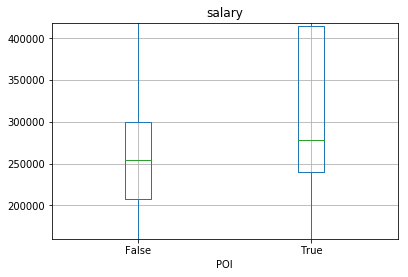

shared_receipt_with_poi                                          \
                        count     mean     std   min      25%     50%   
poi                                                                     
False                    72.0  1058.53  1132.5   2.0   191.50   594.0   
True                     14.0  1783.00  1265.0  91.0  1059.25  1589.0   

                        
           75%     max  
poi                     
False  1635.50  4527.0  
True   2165.25  5521.0

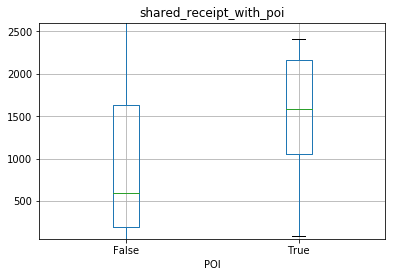

to_messages                                                            
            count     mean      std    min      25%     50%      75%      max
poi                                                                          
False        72.0  2007.11  2693.17   57.0   513.75   944.0  2590.75  15149.0
True         14.0  2417.14  1961.86  225.0  1115.75  1875.0  2969.25   7991.0

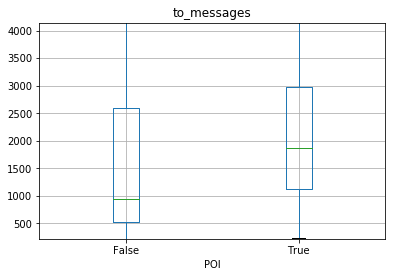

total_payments                                                          \
               count        mean          std      min        25%        50%   
poi                                                                            
False          107.0  4605104.63  29904851.89    148.0   341018.5  1057548.0   
True            18.0  7913589.78  23965492.21  91093.0  1142396.0  1754027.5   

                                
              75%          max  
poi                             
False  2031214.00  309886585.0  
True   2665344.75  103559793.0

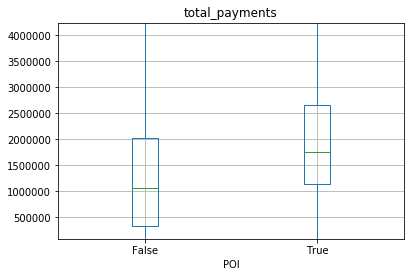

total_stock_value                                                 \
                  count        mean          std       min         25%   
poi                                                                      
False             108.0  6375338.54  41730841.58  -44093.0   428217.25   
True               18.0  9165670.94  13841168.37  126027.0  1016450.25   

                                            
             50%          75%          max  
poi                                         
False  1032337.5   2372703.25  434509511.0  
True   2206835.5  10511334.75   49110078.0

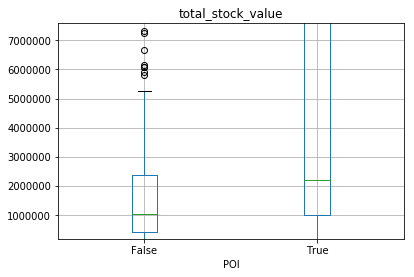

In [30]:
boxplot_by_poi()

Based on this *bonus, deferred_income, from_poi_to_this_person, from_this_person_to_poi, long_term_incentive, restricted_stock, salary, shared_receipt_with_poi* and *total_stock_value* looks like the features with the most potential. I will do my first run using these features.

Looking only at the boxplots, loan_advances and deferral_payments also looks like promising features, but closer inspection reveals that most of the POIs are missing data for those features.

In [31]:
# Making list of features to use
features_to_use = ['bonus', 'deferred_income', 'from_poi_to_this_person', 
                   'from_this_person_to_poi', 'long_term_incentive', 'restricted_stock', 
                   'salary', 'shared_receipt_with_poi', 'total_stock_value']

### Task 2: Remove outliers


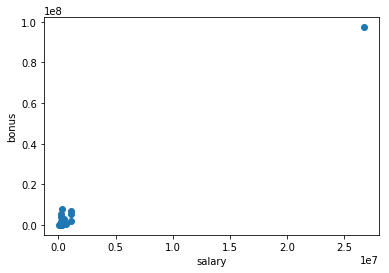

In [32]:
# find salary and bonus outliers
plt.scatter(df_people['salary'], df_people['bonus'] )
    
plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

In [33]:
df_people[df_people['salary'] == df_people['salary'].max()]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619.0,32083396.0,-27992891.0,1398517.0,NaN,311764000.0,5235198.0,NaN,NaN,NaN,...,48521928.0,42667589.0,False,130322299.0,-7576788.0,26704229.0,NaN,NaN,309886585.0,434509511.0


In [34]:
df_people = df_people.drop('TOTAL')

I have remove the column showing total values. For now I will keep the rest of the data points.

### Task 3: Create new feature(s)
- Store to my_dataset for easy export below.

In [35]:
df_people.columns

Index(['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
       'email_address', 'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
       'long_term_incentive', 'other', 'poi', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value'],
      dtype='object')

In [36]:
def fraction_feature(feat_a, feat_b):
    return np.round(
    df_people[feat_a].divide(
        df_people[feat_b], axis='index').fillna(0),4)

In [37]:
# new feature for fraction of messages sent from person to a poi
df_people['fraction_to_poi'] = fraction_feature('from_this_person_to_poi', 'from_messages')
# new feature for fraction of messages sent to a person from a poi
df_people['fraction_from_poi'] = fraction_feature('from_poi_to_this_person', 'to_messages')
# new feature for fraction of messages sent to a person from a poi
df_people['fraction_shared_with_poi'] = fraction_feature('shared_receipt_with_poi', 'to_messages')
# new feature for bonus to salary ratio
df_people['bonus_to_salary_ratio'] = fraction_feature('bonus', 'salary')

fraction_to_poi                                         
                count  mean   std  min   25%   50%   75%   max
poi                                                           
False           127.0  0.09  0.17  0.0  0.00  0.00  0.07  1.00
True             18.0  0.27  0.20  0.0  0.18  0.25  0.37  0.66

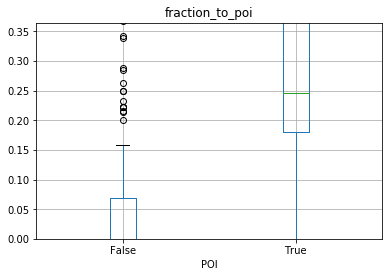

fraction_from_poi                                         
                  count  mean   std  min   25%   50%   75%   max
poi                                                             
False             127.0  0.02  0.04  0.0  0.00  0.00  0.03  0.22
True               18.0  0.04  0.03  0.0  0.02  0.03  0.05  0.14

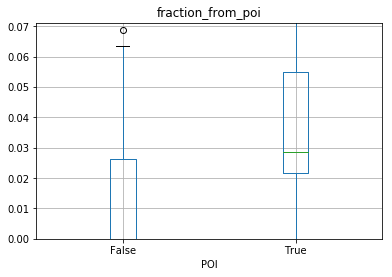

fraction_shared_with_poi                                         
                         count  mean   std  min   25%   50%   75%   max
poi                                                                    
False                    127.0  0.33  0.36  0.0  0.00  0.13  0.66  0.97
True                      18.0  0.61  0.37  0.0  0.44  0.68  0.92  1.00

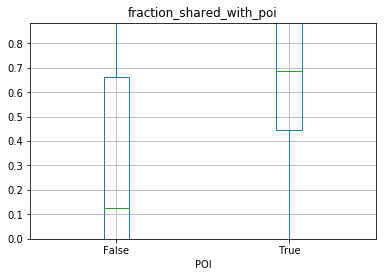

bonus_to_salary_ratio                                         
                      count  mean   std  min  25%   50%   75%    max
poi                                                                 
False                 127.0  1.76  3.27  0.0  0.0  0.46  2.51  23.58
True                   18.0  4.78  5.40  0.0  2.3  3.86  5.16  24.53

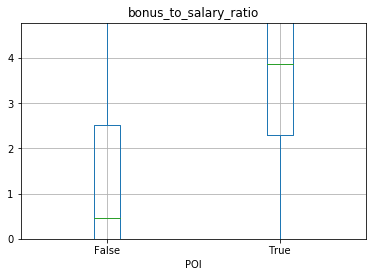

In [38]:
# Checking potential of new features
new_features = ['fraction_to_poi', 'fraction_from_poi', 
                'fraction_shared_with_poi', 'bonus_to_salary_ratio']

boxplot_by_poi(new_features)

In [39]:
# features to use in ML algorithms
features_list = ['poi'] + features_to_use + new_features

In [40]:
# tmp_list = list(df_people.columns)

# tmp_list.remove('poi')

# features_to_use = ['poi'] + tmp_list

In [41]:
# Getting counts of missing data for the selected features
nan_counts(features_list)

,count,prop
deferred_income,97,0.6644
long_term_incentive,80,0.5479
bonus,64,0.4384
shared_receipt_with_poi,59,0.4041
from_this_person_to_poi,59,0.4041
from_poi_to_this_person,59,0.4041
salary,51,0.3493
restricted_stock,36,0.2466
total_stock_value,20,0.1370
bonus_to_salary_ratio,0,0.0000


#### Preparation

In [42]:
my_dataset = df_people.fillna('NaN').to_dict(orient='index')
my_dataset_with_email = df_people[
    df_people['from_messages'].isnull()==False].fillna('NaN').to_dict(orient='index')


print("Count of my_dataset:", len(my_dataset))
print("Count excluding people with missing email information:", len(my_dataset_with_email))

Count of my_dataset: 145
Count excluding people with missing email information: 86


In [43]:
### Extract features and labels from dataset for local testing
from sklearn.cross_validation import train_test_split

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
train_test_split(features, labels, random_state = 42, test_size = 0.3)

data_email = featureFormat(my_dataset_with_email, features_list, sort_keys = True)
email_labels, email_features = targetFeatureSplit(data_email)

em_features_train, em_features_test, em_labels_train, em_labels_test = \
train_test_split(email_features, email_labels, random_state = 42, test_size = 0.3)

In [44]:
len(em_features_train)

60

#### Transformation and feature scaling

In [45]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# features_train = scaler.fit_transform(features_train)
# em_features_train = scaler.fit_transform(em_features_train)

In [46]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# features_train = scaler.fit_transform(features_train)
# em_features_train = scaler.fit_transform(em_features_train)

The two cells commented out above where tried and abandoned (at least for now). Improved scaling has been implemented in scores_for_classifier() below.

### Task 4: Try a varity of classifiers
- Please name your classifier clf for easy export below.
- Note that if you want to do PCA or other multi-stage operations, you'll need to use Pipelines. 
    - For more info: http://scikit-learn.org/stable/modules/pipeline.html

In [254]:
def report_scores(features_test, labels_test, pred):
    
    accuracy = accuracy_score(labels_test, pred)
    precision = precision_score(labels_test, pred)
    recall = recall_score(labels_test, pred)
    f1 = f1_score(labels_test, pred)
    
    cm = confusion_matrix(labels_test, pred)
    cm_index = [np.array(['Actual', 'Actual']),np.array([0, 1])]
    cm_columns = [np.array(['Predicted', 'Predicted']),np.array([0, 1])]

    df_cm = pd.DataFrame(confusion_matrix(labels_test, pred), columns=cm_columns, index=cm_index)
    display(df_cm)
    
    print("Number of people in test set:",len(features_test))
    print("Number of predicted POIs:",sum(pred))
    print("Number of actual POIs in test set:",sum(labels_test))
    print('')
    print("Accuracy score:", round(accuracy, 4))
    print("Precision score:", round(precision, 4))
    print("Recall score:", round(recall, 4))
    print("F1 score:", round(f1,4))

In [48]:
# Importing classifier algorithms to try
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Provided to give you a starting point. Try a variety of classifiers.
# Naive Bayes: Gaussian

from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def scores_for_classifier(classifier, email=False):
    
    clf = make_pipeline(StandardScaler(), PCA(n_components=2), classifier)
    
    if email:
        feat_train = em_features_train
        lab_train = em_labels_train
        feat_test = em_features_test
        lab_test = em_labels_test
    else:
        feat_train = features_train
        lab_train = labels_train
        feat_test = features_test
        lab_test = labels_test
        
    clf.fit(feat_train, lab_train)
    pred = clf.predict(feat_test)
    
    return report_scores(feat_test, lab_test, pred)

In [255]:
# Running Naive Bayes algorithm for all records
scores_for_classifier(GaussianNB())

Predicted   
                 0  1
Actual 0        35  1
       1         4  2

Number of people in test set: 42
Number of predicted POIs: 3.0
Number of actual POIs in test set: 6.0

Accuracy score: 0.881
Precision score: 0.6667
Recall score: 0.3333
F1 score: 0.4444


In [256]:
# Running Naive Bayes algorithm for records with email info only
scores_for_classifier(GaussianNB(), email=True)

/Users/ggaasemyr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ggaasemyr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicted   
                 0  1
Actual 0        24  0
       1         2  0

Number of people in test set: 26
Number of predicted POIs: 0.0
Number of actual POIs in test set: 2.0

Accuracy score: 0.9231
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0


In [257]:
# Running Decision tree algorithm for all records
scores_for_classifier(DecisionTreeClassifier())

Predicted   
                 0  1
Actual 0        34  2
       1         3  3

Number of people in test set: 42
Number of predicted POIs: 5.0
Number of actual POIs in test set: 6.0

Accuracy score: 0.881
Precision score: 0.6
Recall score: 0.5
F1 score: 0.5455


In [258]:
# Running Decision tree algorithm for records with email info only
scores_for_classifier(DecisionTreeClassifier(), email=True)

Predicted   
                 0  1
Actual 0        20  4
       1         2  0

Number of people in test set: 26
Number of predicted POIs: 4.0
Number of actual POIs in test set: 2.0

Accuracy score: 0.7692
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0


In [252]:
# tmp_df = pd.DataFrame(np.array([em_labels_test,pred]))

# tmp_df = tmp_df.append(tmp_df.sum(),ignore_index=True).copy().transpose()

# tmp_df = tmp_df.rename(columns={0:'Actual',1:'Predicted',2:'Total'})

# tmp_df[tmp_df['Total'] > 1]

In [259]:
# Running support vector machine algorithm  with rbf kernel for all records
scores_for_classifier(SVC(C=1, kernel='rbf'))

/Users/ggaasemyr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ggaasemyr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicted   
                 0  1
Actual 0        36  0
       1         6  0

Number of people in test set: 42
Number of predicted POIs: 0.0
Number of actual POIs in test set: 6.0

Accuracy score: 0.8571
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0


In [260]:
# Running support vector machine algorithm  with rbf kernel for records with email info only
scores_for_classifier(SVC(C=1, kernel='rbf'), email=True)

/Users/ggaasemyr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ggaasemyr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicted   
                 0  1
Actual 0        24  0
       1         2  0

Number of people in test set: 26
Number of predicted POIs: 0.0
Number of actual POIs in test set: 2.0

Accuracy score: 0.9231
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0


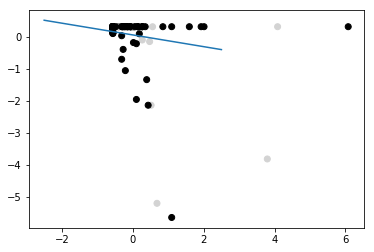

In [79]:
# Create support vector classifier
svc = LinearSVC(C=1.0)

# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(features_train)

# Train model
model = svc.fit(features_train, labels_train)

color = ['black' if c == 0 else 'lightgrey' for c in labels_train]
plt.scatter(X_std[:,0], X_std[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
# plt.axis("off") 
plt.show();

In [160]:
# Running support vector machine algorithm  with linear kernel for all records
scores_for_classifier(LinearSVC(C=1))

Predicted   
                 0  1
Actual 0        36  0
       1         5  1

Number of people in test set: 42
Number of predicted POIs: 1.0
Number of actual POIs in test set: 6.0

Accuracy score: 0.881
Precision score: 1.0
Recall score: 0.1667
F1 score: 0.2857


In [161]:
# Running support vector machine algorithm  with linear kernel for records with email info only
scores_for_classifier(LinearSVC(C=1), email=True)

/Users/ggaasemyr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ggaasemyr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicted   
                 0  1
Actual 0        24  0
       1         2  0

Number of people in test set: 26
Number of predicted POIs: 0.0
Number of actual POIs in test set: 2.0

Accuracy score: 0.9231
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0


In [162]:
# Running random forest algorithm for all records
scores_for_classifier(RandomForestClassifier())

Predicted   
                 0  1
Actual 0        36  0
       1         4  2

Number of people in test set: 42
Number of predicted POIs: 2.0
Number of actual POIs in test set: 6.0

Accuracy score: 0.9048
Precision score: 1.0
Recall score: 0.3333
F1 score: 0.5


In [163]:
# Running random forest algorithm for records with email info only
scores_for_classifier(RandomForestClassifier(), email=True)

Predicted   
                 0  1
Actual 0        23  1
       1         2  0

Number of people in test set: 26
Number of predicted POIs: 1.0
Number of actual POIs in test set: 2.0

Accuracy score: 0.8846
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0


Looking at the precision and recall scores for the different classifier algorithms, including all the data (POIs and non-POIs) seems to make most sense. In the next section I will skip excluding non-email records.

Some classifiers do not perform well at all, regardless of whether non-email records are excluded or not. I suspect this might be due to the imbalanced dataset, where the target group (the POIs) are much fewer than the non-target group.

In [114]:
train_pois = int(sum(labels_train))
test_pois = int(sum(labels_test))
train_non = len(labels_train) - train_pois
test_non = len(labels_test) - test_pois

print("There are {0} known POIs and {1} non-POIs in the training data.".format(train_pois, train_non))
print("There are {0} known POIs and {1} non-POIs in the training data.".format(test_pois, test_non))

There are 12 known POIs and 86 non-POIs in the training data.
There are 6 known POIs and 36 non-POIs in the training data.


### Task 5: Tune your classifier
- Tune your classifier to achieve better than .3 precision and recall using our testing script.
- Check the tester.py script in the final project folder for details on the evaluation method, especially the test_classifier function. 
- Because of the small size of the dataset, the script uses stratified shuffle split cross validation. For more info:
    - [scikit-learn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html)

In [45]:
# param_grid = [
# #   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
#  ]

In [46]:
# applied Chris Albon example

from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import cross_validation

classifier_pipeline = make_pipeline(preprocessing.StandardScaler(), SVC(C=1))

scores = cross_validation.cross_val_score(classifier_pipeline, features_train, labels_train, cv=5)

scores

array([ 0.85714286,  0.85      ,  0.89473684,  0.89473684,  0.89473684])

In [47]:
# applied Chris Albon example, 1/2

from sklearn.grid_search import GridSearchCV

parameter_candidates = [
#   {'C': [1], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)

clf.fit(features_train, labels_train)

/Users/ggaasemyr/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [48]:
# applied Chris Albon example, 2/3

# View the accuracy score
print('Best score for data1:', clf.best_score_)

# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

# Sanity check
# Apply the classifier trained using data1 to data2, and view the accuracy score
print(clf.score(features_test, labels_test))

# Train a new classifier using the best parameters found by the grid search
SVC(C=1, kernel='rbf', gamma=0.001).fit(features_train, labels_train).score(features_test, labels_test)

Best score for data1: 0.8775510204081632
Best C: 1
Best Kernel: rbf
Best Gamma: 0.001
0.857142857143


0.8571428571428571

In [49]:
# applied Chris Albon example, 3/3
scores_for_classifier(SVC(C=1, kernel='rbf', gamma=0.001))

Number of people in test set: 42
Number of predicted POIs: 0.0
Number of actual POIs in test set: 6.0
Accuracy score: 0.8571
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0


/Users/ggaasemyr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ggaasemyr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svc = SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(features_train, labels_train)
                            









# sorted(clf.cv_results_.keys())
# clf.best_estimator_

### Task 6: Prepare files for project submission
- Dump your classifier, dataset, and features_list so anyone can check your results. 
- You do not need to change anything below, but make sure that the version of poi_id.py that you submit can be run on its own and generates the necessary .pkl files for validating your results.

In [51]:

dump_classifier_and_data(clf, my_dataset, features_list)

### Sources


##### Udacity forum threads
[EDA on financial features](https://discussions.udacity.com/t/eda-on-financial-features/192556/7)  
[Pickling Pandas df](https://discussions.udacity.com/t/pickling-pandas-df/174753/23)